In [48]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [49]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("GEMINI_API_KEY")

model = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                               api_key=api_key)

In [50]:
# defining the promptchain state

class PromptChainState(TypedDict):
    topic: str
    outline: str
    blog_content : str
    score: str


In [51]:
def gen_outline(state: PromptChainState) -> PromptChainState:
    """
    Generate an outline for a blog post based on the topic.
    """
    response = model.invoke(f"Generate an outline for a blog post on the topic: {state['topic']}")
    state['outline'] = response.content
    return state

def gen_blog_content(state: PromptChainState) -> PromptChainState:
    """
    Generate the blog content based on the outline.
    """
    response = model.invoke(f"Generate a blog post based on the following outline: {state['outline']}")
    state['blog_content'] = response.content
    return state


def score (state: PromptChainState) -> PromptChainState:
    """
    Score the blog content based on its relevance to the topic.
    """
    response = model.invoke(f"Score the following blog content based on its outline  between 1 to 10  this is outline'{state['outline']}' and this is the blog {state['blog_content']}")
    state['score'] = response.content
    return state

In [52]:
# define the  graph

graph = StateGraph(PromptChainState)


# add nodes to the graph

graph.add_node("gen_outline",gen_outline)
graph.add_node("gen_blog_content",gen_blog_content)
graph.add_node("score", score )


# add edges to the graph

graph.add_edge(START, "gen_outline")
graph.add_edge("gen_outline", "gen_blog_content")
graph.add_edge("gen_blog_content", 'score')
graph.add_edge("score", END)

In [53]:
workflow  = graph.compile()

In [54]:
initial_state  = {"topic": "choose the best topic for the final year project ",}

res=workflow.invoke(initial_state) 


In [55]:
res

{'topic': 'choose the best topic for the final year project ',
 'outline': '## Blog Post Outline: Choosing the Best Final Year Project Topic\n\n**I. Introduction (Hook & Problem Statement)**\n\n*   Start with a relatable anecdote or question about the stress of choosing a final year project.\n*   Highlight the importance of choosing the right topic – impacting grades, future career, and overall academic experience.\n*   Briefly mention the common struggles students face (lack of ideas, fear of failure, overwhelming options).\n\n**II. Understanding Your Constraints & Preferences**\n\n*   **A. Academic Requirements:**\n    *   Specific guidelines from your department/university.\n    *   Available resources (supervisors, equipment, data access).\n    *   Timeline and workload considerations.\n*   **B. Personal Interests & Skills:**\n    *   Identify your strengths and weaknesses.\n    *   Reflect on your passions and areas of genuine curiosity.\n    *   Consider your long-term career goa

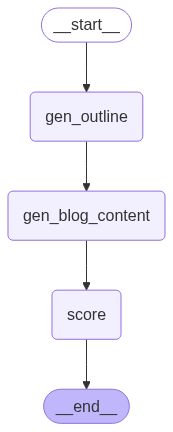

In [56]:
graph.compile()